In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install folium==0.2.1
!pip install markupsafe==2.1.1
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.7 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=4abb9e4ee5af1ed76686b8208b226974e8bd6c195b72c98dd12baa7f16e464a7
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import random as rn
import os
import scipy.stats as stats
import datetime
import calendar

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold
from sklearn import metrics

from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings(action='ignore')

In [ ]:
2. EDA | Exploratory Data Analysis
id : 샘플 아이디 | Year_Birth : 고객 생년월일 | Education : 고객 학력
Marital_status : 고객 결혼 상태 | Income : 고객 연간 가구 소득 |
Kidhome : 고객 가구의 자녀 수 | Teenhome : 고객 가구의 청소년 수 | Dt_Customer : 고객이 회사에 등록한 날짜
Recency : 고객의 마지막 구매 이후 일수 | NumDealsPurchases : 할인된 구매 횟수 | NumWebPurchases : 회사 웹사이트를 통한 구매 건수
NumCatalogPurchases : 카탈로그를 사용한 구매 수 | NumStorePuchases : 매장에서 직접 구매한 횟수
NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
AcceptedCmp(1-5) : 고객이 (1-5) 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
target : 고객의 제품 총 소비량

SyntaxError: ignored

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head(10)

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444
5,5,1952,Graduation,Single,47958.0,0,1,19-01-2013,8,2,...,5,5,0,0,0,0,0,0,0,407
6,6,1971,Graduation,Single,22804.0,1,0,31-07-2013,75,1,...,2,9,0,0,0,0,0,0,0,26
7,7,1978,Graduation,Widow,54162.0,1,1,18-03-2013,31,1,...,3,4,0,0,0,0,0,0,0,42
8,8,1968,Graduation,Married,45688.0,0,1,25-01-2014,20,2,...,8,4,0,1,0,0,0,0,0,306
9,9,1952,Graduation,Single,61823.0,0,1,18-02-2013,26,4,...,10,7,0,0,0,0,0,0,0,884


In [ ]:
test.head(10)

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,1979,Graduation,Single,57537.0,1,0,10-06-2013,83,4,...,3,8,4,0,0,0,0,0,0,0
1,1,1955,Graduation,Together,65748.0,0,1,15-04-2013,58,2,...,4,10,1,0,0,0,0,0,1,0
2,2,1984,Graduation,Married,55434.0,1,0,05-10-2013,21,3,...,3,13,4,0,0,0,0,0,0,0
3,3,1960,Graduation,Married,67716.0,0,1,10-01-2013,8,4,...,4,13,5,0,1,0,0,0,0,0
4,4,1976,Graduation,Together,85606.0,0,1,12-11-2012,89,2,...,7,9,3,0,0,0,1,0,0,0
5,5,1975,Graduation,Widow,58330.0,0,1,25-12-2013,87,1,...,4,13,4,0,0,0,0,0,0,0
6,6,1973,Graduation,Married,31814.0,1,0,09-02-2013,73,2,...,0,3,9,1,0,0,0,0,0,0
7,7,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,3,...,10,4,7,0,0,0,0,0,0,1
8,8,1977,Graduation,Married,72117.0,0,1,20-08-2013,34,1,...,7,9,5,0,0,0,0,0,0,0
9,9,1975,Master,Together,17459.0,1,0,19-09-2013,12,3,...,1,2,7,0,0,0,0,0,0,1


In [ ]:
train.isnull().sum()

id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
target                 0
dtype: int64

In [ ]:
test.isnull().sum()

id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [ ]:
df_train = train.copy()
df_test = test.copy() #copy함수를 통해 복제 변수 생성

In [ ]:
# 이상치 탐색 -> numerical 데이터 사용

numeric_fts = ["Year_Birth", "Income", "Recency", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

train_outlier_ind = []
for i in numeric_fts:
  Q1 = np.percentile(df_train[i], 25)
  Q3 = np.percentile(df_train[i], 75)
  IQR = Q3-Q1
  train_outlier_list = df_train[(df_train[i] < Q1 - 1.5*IQR) | (df_train[i] > Q3 + 1.5*IQR)].index
  train_outlier_ind.extend(train_outlier_list) # extend함수는 가장 끝부분부터 이상치가 존재하는 변수를 리스트에 담음

train_outlier_ind = Counter(train_outlier_ind) #counter 함수는 매개변수의 값을 딕셔너리로 바꿔줌 
print(train_outlier_ind)
train_multi_outliers = list(k for k,j in train_outlier_ind.items() if j>2)
print(train_multi_outliers)
print("The number of train outiers : ", len(train_multi_outliers))


Counter({91: 2, 182: 2, 975: 2, 760: 1, 865: 1, 246: 1, 686: 1, 730: 1, 0: 1, 4: 1, 12: 1, 44: 1, 64: 1, 90: 1, 149: 1, 155: 1, 157: 1, 184: 1, 205: 1, 211: 1, 225: 1, 236: 1, 306: 1, 344: 1, 361: 1, 367: 1, 414: 1, 510: 1, 541: 1, 600: 1, 690: 1, 696: 1, 697: 1, 701: 1, 717: 1, 736: 1, 778: 1, 791: 1, 864: 1, 872: 1, 890: 1, 898: 1, 927: 1, 946: 1, 1002: 1, 1038: 1, 1066: 1, 1067: 1, 1074: 1, 1101: 1, 1106: 1, 617: 1, 892: 1, 89: 1, 243: 1, 348: 1, 572: 1, 604: 1, 640: 1, 900: 1, 979: 1, 297: 1, 1097: 1})
[]
The number of train outiers :  0


In [ ]:
#왜도를 기준으로 왜곡된 분포인지 아닌지를 판별
print(df_train[numeric_fts].skew())

Year_Birth            -0.439100
Income                 0.291634
Recency               -0.061310
NumDealsPurchases      2.264245
NumWebPurchases        1.289607
NumCatalogPurchases    1.099499
NumStorePurchases      0.653689
NumWebVisitsMonth      0.299000
dtype: float64


#시각화1

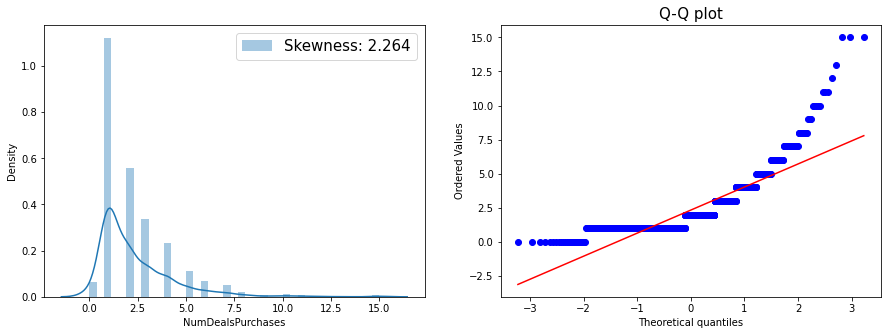

In [ ]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1) #1행 2열 중 첫 번째 칸
ax2 = fig.add_subplot(1,2,2) #1행 2열 중 두 번째 칸

#히스토그램abel='Skewness, :.2f는 소숫점 2자리까지 표현하라는 뜻
sns.distplot(df_train['NumDealsPurchases'], ax = ax1, label = 'Skewness: {:.3f}'.format(df_train['NumDealsPurchases'].skew()))
ax1.legend(loc='best', fontsize = 15) #범례 위치 best인곳에 지정

#qqplot그리기
stats.probplot(df_train['NumDealsPurchases'], plot = ax2)
plt.title('Q-Q plot', fontsize = 15)
plt.show()

#시각화2

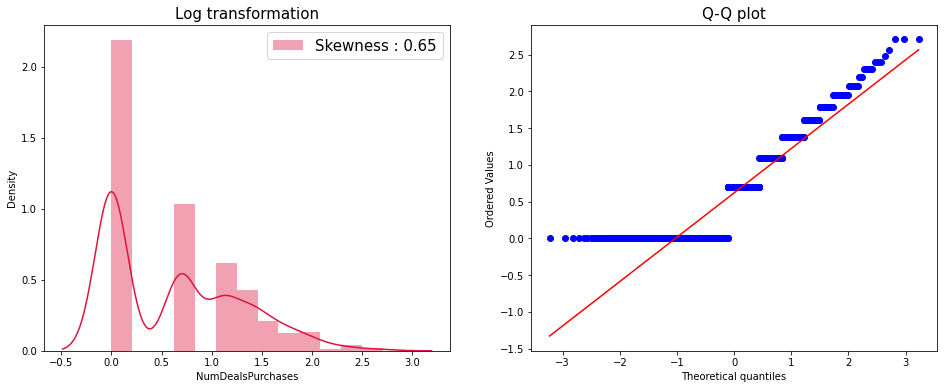

In [ ]:
# NumDealsPurchase 변수의 왜도 값이 2의 값이 넘어가 해당 변수의 재변환 필요

log_trains = df_train['NumDealsPurchases'].map(lambda i: np.log(i) if i>0 else 0) #i가 0보다 크면 np.log(i) 값으로 변환하고 0보다 작으면 0으로 간주

fig = plt.figure(figsize = (16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#히스토그램
sns.distplot(log_trains, ax = ax1, color='crimson', label='Skewness : {:.2f}'.format(log_trains.skew()))
ax1.legend(loc='best', fontsize = 15)
ax1.set_title('Log transformation', fontsize=15)

#Q-Q plot
stats.probplot(log_trains, plot = ax2)
ax2.set_title("Q-Q plot", fontsize=15)
plt.show()


#시각화3

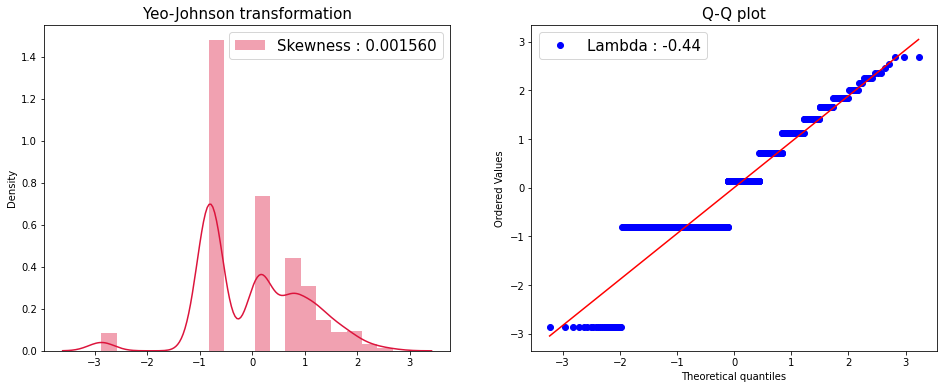

In [ ]:
#사이킷런의 여-존슨 변환 사용

yj = PowerTransformer(method = 'yeo-johnson')
yj.fit(df_train['NumDealsPurchases'].values.reshape(-1,1)) #fit함수 찾아보기
x_yj = yj.transform(df_train['NumDealsPurchases'].values.reshape(-1,1)) # -1~1사이의 값으로 재변환

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(x_yj, ax=ax1, color='crimson', label='Skewness : {:5f}'.format(np.float(stats.skew(x_yj))))
ax1.legend(loc='best', fontsize=15)
ax1.set_title("Yeo-Johnson transformation", fontsize=15)

stats.probplot(x_yj.reshape(x_yj.shape[0]), plot=ax2)
ax2.legend(["Lambda : {:.2f}".format(np.float(yj.lambdas_))], loc='best', fontsize=15)
ax2.set_title("Q-Q plot", fontsize=15)
plt.show()



In [ ]:
#이전 주차 이어서

#test데이터도 여-존슨 변환 수행
test_yj = PowerTransformer(method='yeo-johnson')
test_yj.fit(df_test['NumDealsPurchases'].values.reshape(-1,1))
test_x_yj = test_yj.transform(df_test['NumDealsPurchases'].values.reshape(-1,1))
df_test['NumDealsPurchases'] = test_x_yj

In [ ]:
corr_fts1 = ["Income", "Kidhome", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "AcceptedCmp1", "AcceptedCmp5", "target"]
corr_fts2 = ["NumDealsPurchases", "Teenhome"]

#시각화4

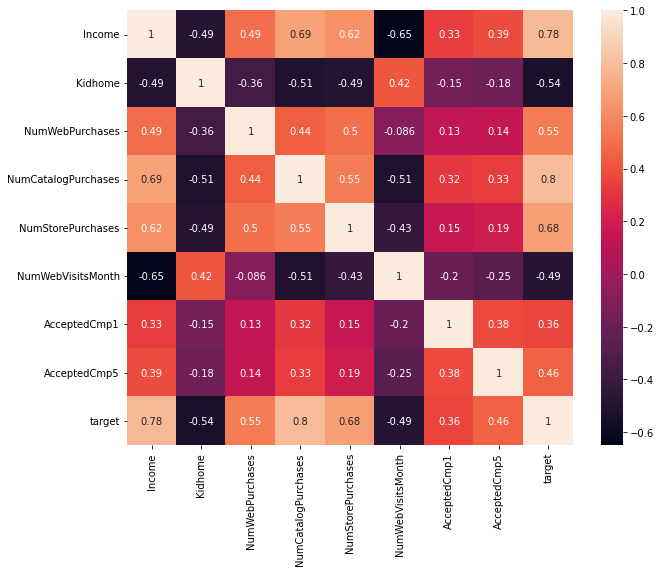

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train[corr_fts1].corr(), annot=True) #annot옵션은 각 셀의 값을 표기해줌 

plt.show()

#시각화5

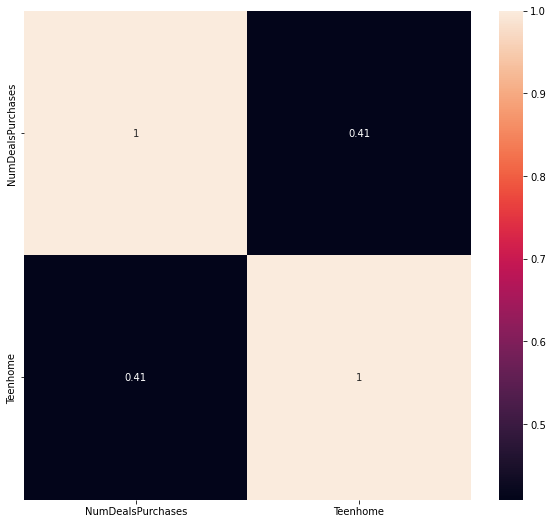

In [ ]:
plt.figure(figsize=(10,9))
sns.heatmap(df_train[corr_fts2].corr(), annot=True)

plt.show()

In [ ]:
#독립변수 간 높은 상관관계는 다중공선성을 초래할 수 있기 때문에 좋지 않음 -> 변수 선택, 차원 축소, 규저 등으로 해결 가능

#여-존슨 변환한 값을 포함하는 df_train과 df_test의 복사본 생성
train_dataset = df_train.copy()
test_dataset = df_test.copy()

#회사 등록일 출력
train_dataset["Dt_Customer"]


0       21-01-2013
1       24-05-2014
2       08-04-2013
3       29-03-2014
4       10-06-2014
           ...    
1103    31-03-2013
1104    21-10-2013
1105    16-12-2013
1106    30-05-2013
1107    29-10-2012
Name: Dt_Customer, Length: 1108, dtype: object

In [ ]:
#datetime 함수로 object타입인 Dt_Customer을 시간으로 나타내는 datetime으로 변환

train_dataset["Dt_Customer"] = pd.to_datetime(train_dataset["Dt_Customer"], format = "%d-%m-%Y")
test_dataset["Dt_Customer"] = pd.to_datetime(test_dataset["Dt_Customer"], format = "%d-%m-%Y")

train_dataset["Dt_Customer"] #datetime형태로 바뀐 것을 알 수 있음 

0      2013-01-21
1      2014-05-24
2      2013-04-08
3      2014-03-29
4      2014-06-10
          ...    
1103   2013-03-31
1104   2013-10-21
1105   2013-12-16
1106   2013-05-30
1107   2012-10-29
Name: Dt_Customer, Length: 1108, dtype: datetime64[ns]

In [ ]:
#가장 오래된 날짜
print(f'Minimum date : {train_dataset["Dt_Customer"].min()}') #f는 f-string 포맷팅을 의미

#가장 최근인 날짜
print(f'Maximum date : {train_dataset["Dt_Customer"].max()}')

Minimum date : 2012-07-31 00:00:00
Maximum date : 2014-06-29 00:00:00


In [ ]:
#모델링에 사용할 수 있도록 새 수치형 변수를 만들고자함
# 가장 과거 시점의 회사 등록일로부터 며칠이 지났는지를 뜻하는 Pass_Customer변수 생성 -> 회사에 등록한 시점에 대한 정보를 유지하면서 새로운 변수 생성

train_diff_date = train_dataset["Dt_Customer"] - train_dataset["Dt_Customer"].min()
test_diff_date = test_dataset["Dt_Customer"] - test_dataset["Dt_Customer"].min()
print(train_diff_date) #과거 시점으로 부터 얼마나 지났는지 days형태로 출력해줌 

train_dataset["Pass_Customer"] = [i.days for i in train_diff_date]
test_dataset["Pass_Customer"] = [i.days for i in test_diff_date]

train_dataset["Pass_Customer"].head(10)

0      174 days
1      662 days
2      251 days
3      606 days
4      679 days
         ...   
1103   243 days
1104   447 days
1105   503 days
1106   303 days
1107    90 days
Name: Dt_Customer, Length: 1108, dtype: timedelta64[ns]


0    174
1    662
2    251
3    606
4    679
5    172
6    365
7    230
8    543
9    202
Name: Pass_Customer, dtype: int64

In [ ]:
# Year_Birth 변수 -> 고객의 나이를 뜻하는 Age변수를 새롭게 생성

print("Minimum birth : ", train_dataset["Year_Birth"].min(), "\nMaximum Birth : ", train_dataset["Year_Birth"].max())
train_dataset["Year_Birth"].head()

Minimum birth :  1893 
Maximum Birth :  1996


0    1974
1    1962
2    1951
3    1974
4    1946
Name: Year_Birth, dtype: int64

In [ ]:
# 현재 년도에서 Year_Birth를 빼고 +1 = 현재 나이 

train_dataset["Age"] = 2022 - train_dataset["Year_Birth"] + 1
test_dataset["Age"] = 2022 - test_dataset["Year_Birth"] + 1

train_dataset["Age"].head()

0    49
1    61
2    72
3    49
4    77
Name: Age, dtype: int64

In [ ]:
# AcceptedCmp(1~5) : 고객이 (1-5) 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
# Response : 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0

#AcceptCount변수 생성
train_dataset["AcceptCount"] = train_dataset["AcceptedCmp1"] + train_dataset["AcceptedCmp2"] + train_dataset["AcceptedCmp3"] + train_dataset["AcceptedCmp4"] + train_dataset["AcceptedCmp5"] + train_dataset["Response"]

train_dataset["AcceptCount"].head(10)

#print(train_dataset["AcceptedCmp1"].head(10))
#print(train_dataset["AcceptedCmp2"].head(10))

test_dataset["AcceptCount"] = test_dataset["AcceptedCmp1"] + test_dataset["AcceptedCmp2"] + test_dataset["AcceptedCmp3"] + test_dataset["AcceptedCmp4"] + test_dataset["AcceptedCmp5"] + test_dataset["Response"]

#train_dataset["AcceptCount"].head(10)

In [ ]:
# 고객 중 최소/최대 수락 횟수

print("Minimum count : ", train_dataset["AcceptCount"].min(), "\nMaximum count : ", train_dataset["AcceptCount"].max())

#train데이터에서 6번의 캠페인 제안으로 모두 수락한 경우는 없는 것으로 확인됨 -> 최대값이 5이기 때문


Minimum count :  0 
Maximum count :  5


In [ ]:
#기존 변수와 target(고객의 제품 총 소비량) 간 상관관계
train_dataset[['Year_Birth', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Response','target']].corr()

,Year_Birth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,target
Year_Birth,1.000000,-0.050053,-0.034204,0.066802,-0.111485,-0.010873,-0.012304,-0.136035
AcceptedCmp1,-0.050053,1.000000,0.198530,0.052213,0.184717,0.379563,0.268577,0.361102
AcceptedCmp2,-0.034204,0.198530,1.000000,0.052513,0.328941,0.192139,0.201945,0.129995
AcceptedCmp3,0.066802,0.052213,0.052513,1.000000,-0.083690,0.060890,0.194275,0.040736
AcceptedCmp4,-0.111485,0.184717,0.328941,-0.083690,1.000000,0.313120,0.189849,0.256784
AcceptedCmp5,-0.010873,0.379563,0.192139,0.060890,0.313120,1.000000,0.336610,0.458208
Response,-0.012304,0.268577,0.201945,0.194275,0.189849,0.336610,1.000000,0.242760
target,-0.136035,0.361102,0.129995,0.040736,0.256784,0.458208,0.242760,1.000000


In [ ]:
print(train_dataset["Dt_Customer"].head(5))

0   2013-01-21
1   2014-05-24
2   2013-04-08
3   2014-03-29
4   2014-06-10
Name: Dt_Customer, dtype: datetime64[ns]


In [ ]:
#년, 월, 일 단위로 데이터 추출

year = pd.to_datetime(train_dataset["Dt_Customer"]).dt.year #왜 dt.year을 해야만 실행이 되지?
month = pd.to_datetime(train_dataset["Dt_Customer"]).dt.month
day = pd.to_datetime(train_dataset["Dt_Customer"]).dt.day

# target과의 상관관계 출력 
print(np.corrcoef(year, train_dataset["target"]), '\n')
print(np.corrcoef(month, train_dataset["target"]), '\n')
print(np.corrcoef(day, train_dataset["target"]), '\n')

[[ 1.         -0.15940385]
 [-0.15940385  1.        ]] 

[[1.         0.03764911]
 [0.03764911 1.        ]] 

[[1.         0.01891694]
 [0.01891694 1.        ]] 



In [ ]:
#새롭게 생성한 변수들과 target과의 상관관계
train_dataset[["Pass_Customer", "Age", "AcceptCount", "target"]].corr()

,Pass_Customer,Age,AcceptCount,target
Pass_Customer,1.000000,0.012309,-0.080152,-0.174969
Age,0.012309,1.000000,0.043180,0.136035
AcceptCount,-0.080152,0.043180,1.000000,0.444114
target,-0.174969,0.136035,0.444114,1.000000


In [ ]:
train_dataset.head(10)

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Pass_Customer,Age,AcceptCount
0,0,1974,Master,Together,46014.0,1,1,2013-01-21,21,10,...,0,0,0,0,0,0,541,174,49,0
1,1,1962,Graduation,Single,76624.0,0,1,2014-05-24,68,1,...,0,0,0,0,0,0,899,662,61,1
2,2,1951,Graduation,Married,75903.0,0,1,2013-04-08,50,2,...,0,0,0,0,0,0,901,251,72,0
3,3,1974,Basic,Married,18393.0,1,0,2014-03-29,2,2,...,0,0,0,0,0,0,50,606,49,0
4,4,1946,PhD,Together,64014.0,2,1,2014-06-10,56,7,...,0,0,1,0,0,0,444,679,77,1
5,5,1952,Graduation,Single,47958.0,0,1,2013-01-19,8,2,...,0,0,0,0,0,0,407,172,71,0
6,6,1971,Graduation,Single,22804.0,1,0,2013-07-31,75,1,...,0,0,0,0,0,0,26,365,52,0
7,7,1978,Graduation,Widow,54162.0,1,1,2013-03-18,31,1,...,0,0,0,0,0,0,42,230,45,0
8,8,1968,Graduation,Married,45688.0,0,1,2014-01-25,20,2,...,1,0,0,0,0,0,306,543,55,1
9,9,1952,Graduation,Single,61823.0,0,1,2013-02-18,26,4,...,0,0,0,0,0,0,884,202,71,0


#모델링을 위한 데이터 전처리

In [ ]:
# 새롭게 변수를 생성한 데이터 셋을 다시 복제해 모델 학습 데이터로 사용
train_data = train_dataset.copy()
test_data = test_dataset.copy()

In [ ]:
#원-핫 인코딩을 위한 데이터 전처리

#사용하지 않는 변수 제거
drop_col = ['Dt_Customer', 'Year_Birth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
train_data = train_data.drop(drop_col, axis=1) #열 기준으로 삭제
test_data = test_data.drop(drop_col, axis=1)

In [ ]:
# unique 함수 : 지정한 변수에 대응되는 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수
print(train_data["Education"].unique())
print(train_data["Marital_Status"].unique())


['Master' 'Graduation' 'Basic' 'PhD' '2n Cycle']
['Together' 'Single' 'Married' 'Widow' 'Divorced' 'Alone' 'YOLO' 'Absurd']


In [ ]:
#원-핫 인코딩

train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

print(train_data.head(10)) #Education과 Marital_Status의 데이터를 기준으로 pd.get_dummies로 더미화를 시킨 것을 볼 수 있음

   id   Income  Kidhome  Teenhome  Recency  NumDealsPurchases  \
0   0  46014.0        1         1       21                 10   
1   1  76624.0        0         1       68                  1   
2   2  75903.0        0         1       50                  2   
3   3  18393.0        1         0        2                  2   
4   4  64014.0        2         1       56                  7   
5   5  47958.0        0         1        8                  2   
6   6  22804.0        1         0       75                  1   
7   7  54162.0        1         1       31                  1   
8   8  45688.0        0         1       20                  2   
9   9  61823.0        0         1       26                  4   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                7                    1                  8                  7   
1                5                   10                  7                  1   
2                6                    6  

In [ ]:
print("Length of train column : ", len(train_data.columns))
print("Length of test column : ", len(test_data.columns))

Length of train column :  28
Length of test column :  27


In [ ]:
print(train_data.columns)
print(test_data.columns)

Index(['id', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'target', 'Pass_Customer', 'Age',
       'AcceptCount', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')
Index(['id', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Pass_Customer', 'Age', 'AcceptCount',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alon

In [ ]:
train_data.head()

,id,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,46014.0,1,1,21,10,7,1,8,7,...,1,0,0,0,0,0,0,1,0,0
1,1,76624.0,0,1,68,1,5,10,7,1,...,0,0,0,0,0,0,1,0,0,0
2,2,75903.0,0,1,50,2,6,6,9,3,...,0,0,0,0,0,1,0,0,0,0
3,3,18393.0,1,0,2,2,3,0,3,8,...,0,0,0,0,0,1,0,0,0,0
4,4,64014.0,2,1,56,7,8,2,5,7,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
drop_col = ['id', 'target']

train_x = train_data.drop(drop_col, axis=1)  
train_y = pd.DataFrame(train_data['target'])

In [ ]:
print(train_x)

       Income  Kidhome  Teenhome  Recency  NumDealsPurchases  NumWebPurchases  \
0     46014.0        1         1       21                 10                7   
1     76624.0        0         1       68                  1                5   
2     75903.0        0         1       50                  2                6   
3     18393.0        1         0        2                  2                3   
4     64014.0        2         1       56                  7                8   
...       ...      ...       ...      ...                ...              ...   
1103  46097.0        0         1       11                  5                3   
1104  23477.0        1         0       39                  3                3   
1105  37368.0        1         0        4                  1                1   
1106  53034.0        1         1       30                  8                6   
1107  46610.0        0         2        8                  6                4   

      NumCatalogPurchases  

In [ ]:
print(train_y) # target을 기준으로 데이터 프레임 형성  

      target
0        541
1        899
2        901
3         50
4        444
...      ...
1103     241
1104     147
1105      30
1106     447
1107     302

[1108 rows x 1 columns]


In [ ]:
test_x = test_data.drop('id', axis=1)

In [ ]:
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)

print(train_x.shape, train_y.shape)
print(test_x.shape)

(1108, 26) (1108, 1)
(1108, 26)


In [ ]:
print(train_x) # train_x에 대한 행렬값으로 변경 -> 모델을 학습시키기 위해 

[[4.6014e+04 1.0000e+00 1.0000e+00 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [7.6624e+04 0.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [7.5903e+04 0.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [3.7368e+04 1.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [5.3034e+04 1.0000e+00 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [4.6610e+04 0.0000e+00 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


#모델링



---
Elastic-Net


In [ ]:
#Elastic-Net 모델
ela_param_grid = {'alpha': np.arange(1e-4, 1e-3, 1e-4), #L1규제에 필요한 alpha
                  'l1_ratio': np.arange(0.1, 1.0, 0.1), #L2규제에 필요한 l1_ratio
                  'max_iter': [100000]}

elasticnet = ElasticNet(random_state = 34) # 랜덤 시드 고정 -> 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있습니다.

ela_rkfold = RepeatedKFold(n_splits = 5, n_repeats = 5, random_state = 34) #K-fold 교차검정
ela_gsearch = GridSearchCV(elasticnet, ela_param_grid, cv=ela_rkfold, scoring='neg_mean_absolute_error', verbose=1, return_train_score=True)



In [ ]:
ela_gsearch.fit(train_x, train_y)

Fitting 25 folds for each of 81 candidates, totalling 2025 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=34),
             estimator=ElasticNet(random_state=34),
             param_grid={'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [100000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
elasticnet = ela_gsearch.best_estimator_
ela_grid_results = pd.DataFrame(ela_gsearch.cv_results_)

In [ ]:
print(elasticnet.predict)

<bound method LinearModel.predict of ElasticNet(alpha=0.0009000000000000001, l1_ratio=0.1, max_iter=100000,
           random_state=34)>


In [ ]:
print(ela_grid_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.178145      0.030568         0.000871        0.000059      0.0001   
1        0.177992      0.022060         0.000862        0.000060      0.0001   
2        0.186678      0.021380         0.000889        0.000107      0.0001   
3        0.213855      0.020115         0.000846        0.000140      0.0001   
4        0.236812      0.020686         0.000874        0.000114      0.0001   
..            ...           ...              ...             ...         ...   
76       0.029608      0.005311         0.000754        0.000068      0.0009   
77       0.035287      0.007719         0.000729        0.000036      0.0009   
78       0.041374      0.007080         0.000718        0.000032      0.0009   
79       0.055538      0.011230         0.000781        0.000217      0.0009   
80       0.094606      0.017999         0.000731        0.000022      0.0009   

   param_l1_ratio param_max_iter  \
0  

#모델링


---
XGBoost


In [ ]:
#XGBoost

xgb = XGBRegressor(objective='reg:squarederror', random_state=34)

xgb_param_grid = {'n_estimators' : np.arange(100,500,100), 'max_depth' : [1,2,3],}

xgb_rkfold = RepeatedKFold(n_splits = 5, n_repeats = 1, random_state = 34)
xgb_gsearch = GridSearchCV(xgb, xgb_param_grid, cv = xgb_rkfold, scoring='neg_mean_absolute_error', verbose=1, return_train_score = True)

In [ ]:
xgb_gsearch.fit(train_x, train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=34),
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=34),
             param_grid={'max_depth': [1, 2, 3],
                         'n_estimators': array([100, 200, 300, 400])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
xgb = xgb_gsearch.best_estimator_
xgb_grid_results = pd.DataFrame(xgb_gsearch.cv_results_)

In [ ]:
print(xgb)

XGBRegressor(n_estimators=400, objective='reg:squarederror', random_state=34)


In [ ]:
print(xgb_grid_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.047273      0.003377         0.001041        0.000155   
1        0.087189      0.005053         0.001448        0.000277   
2        0.124453      0.005079         0.002290        0.001512   
3        0.163095      0.006511         0.001864        0.000131   
4        0.068636      0.005198         0.001292        0.000026   
5        0.126973      0.006528         0.002091        0.000677   
6        0.186729      0.005370         0.003061        0.001574   
7        0.249845      0.018045         0.002747        0.000072   
8        0.088104      0.002360         0.001503        0.000019   
9        0.168137      0.003422         0.002059        0.000069   
10       0.249339      0.004933         0.002729        0.000029   
11       0.332745      0.007550         0.003548        0.000040   

   param_max_depth param_n_estimators                                 params  \
0                1                1

#모델링


---
LightGBM



In [ ]:
#LightGBM

lgbm = LGBMRegressor(objective='regression', random_state = 34)

lgbm_param_grid = {'n_estimators': [8,16,24], 'num_leaves': [6,8,12,16], 'reg_alpha' : [1,1.2], 'reg_lambda' : [1,1.2,1.4]}


lgbm_rkfold = RepeatedKFold(n_splits = 5, n_repeats = 1, random_state = 34)
lgbm_gsearch = GridSearchCV(lgbm, lgbm_param_grid, cv = lgbm_rkfold, scoring='neg_mean_absolute_error',
                               verbose=1, return_train_score=True)

In [ ]:
lgbm_gsearch.fit(train_x, train_y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=34),
             estimator=LGBMRegressor(objective='regression', random_state=34),
             param_grid={'n_estimators': [8, 16, 24],
                         'num_leaves': [6, 8, 12, 16], 'reg_alpha': [1, 1.2],
                         'reg_lambda': [1, 1.2, 1.4]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
lgbm = lgbm_gsearch.best_estimator_        
lgbm_grid_results = pd.DataFrame(lgbm_gsearch.cv_results_)  

#모델링


---
Blending Models - 앙상블


In [ ]:
#Blending Models - 앙상블

def blended_models(X):
  return((elasticnet.predict(X)) + (xgb.predict(X)) + (lgbm.predict(X)))/3


In [ ]:
ensemble_pred = blended_models(test_x)

In [ ]:
print(ensemble_pred)

[ 643.74121519  846.65280779  895.15567147 ...  119.79229493 1108.39802808
  240.43970117]
